In [1]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.display import Image 


# Check out coarse grained dataset

In [2]:
SAM_DIR = '/local/S.Rasp/SAM/'

In [57]:
!ls $SAM_DIR

2018-12-15-longitude-slice-ngaqua.nc  data


In [153]:
ngaqua = xr.open_dataset(f'{SAM_DIR}2018-12-15-longitude-slice-ngaqua.nc')

In [32]:
ngaqua

<xarray.Dataset>
Dimensions:     (step: 2, time: 640, x: 5, y: 64, z: 34)
Coordinates:
  * step        (step) float64 0.0 0.003471
  * time        (time) float64 100.6 100.8 100.9 101.0 ... 180.2 180.4 180.5
  * x           (x) float32 0.0 160000.0 320000.0 480000.0 640000.0
  * y           (y) float32 0.0 160000.0 320000.0 ... 9920000.0 10080000.0
  * z           (z) float32 37.0 112.0 194.0 288.0 ... 24000.0 25500.0 27000.0
Data variables:
    FQT         (time, z, y, x) float64 ...
    FSLI        (time, z, y, x) float64 ...
    FU          (time, z, y, x) float64 ...
    FV          (time, z, y, x) float64 ...
    LHF         (time, y, x) float32 ...
    PP          (time, step, z, y, x) float32 ...
    Prec        (time, y, x) float32 ...
    QT          (time, step, z, y, x) float32 ...
    QV          (time, step, z, y, x) float32 ...
    RADSFC      (time, y, x) float32 ...
    RADTOA      (time, y, x) float32 ...
    SHF         (time, y, x) float32 ...
    SLI         (time, 

In [87]:
ngaqua.FQT

<xarray.DataArray 'FQT' (time: 640, z: 34, y: 64, x: 5)>
[6963200 values with dtype=float64]
Coordinates:
  * time     (time) float64 100.6 100.8 100.9 101.0 ... 180.1 180.2 180.4 180.5
  * x        (x) float32 0.0 160000.0 320000.0 480000.0 640000.0
  * y        (y) float32 0.0 160000.0 320000.0 ... 9920000.0 10080000.0
  * z        (z) float32 37.0 112.0 194.0 288.0 ... 24000.0 25500.0 27000.0

So this is the data only for a small lon band.

What is the step dimension?

In [42]:
ngaqua.step

<xarray.DataArray 'step' (step: 2)>
array([0.      , 0.003471])
Coordinates:
  * step     (step) float64 0.0 0.003471

In [43]:
ngaqua.time

<xarray.DataArray 'time' (time: 640)>
array([100.625, 100.75 , 100.875, ..., 180.25 , 180.375, 180.5  ])
Coordinates:
  * time     (time) float64 100.6 100.8 100.9 101.0 ... 180.1 180.2 180.4 180.5
Attributes:
    units:      day
    long_name:  time

In [49]:
(ngaqua.time[1] - ngaqua.time[0]) * 24

<xarray.DataArray 'time' ()>
array(3.)

3 hour time step

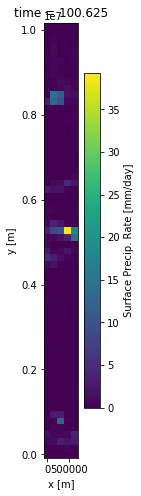

In [41]:
fig, ax = plt.subplots(figsize=(2, 8))
ngaqua.Prec.isel(time=0).plot()
ax.set_aspect('equal')

In [50]:
ngaqua.TABS

<xarray.DataArray 'TABS' (time: 640, step: 2, z: 34, y: 64, x: 5)>
[13926400 values with dtype=float32]
Coordinates:
  * step     (step) float64 0.0 0.003471
  * time     (time) float64 100.6 100.8 100.9 101.0 ... 180.1 180.2 180.4 180.5
  * x        (x) float32 0.0 160000.0 320000.0 480000.0 640000.0
  * y        (y) float32 0.0 160000.0 320000.0 ... 9920000.0 10080000.0
  * z        (z) float32 37.0 112.0 194.0 288.0 ... 24000.0 25500.0 27000.0
Attributes:
    long_name:  Absolute Temperature                                         ...
    units:      K         

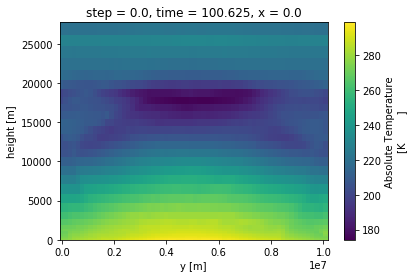

In [52]:
ngaqua.TABS.isel(time=0, step=0, x=0).plot()

In [85]:
ngaqua.layer_mass

<xarray.DataArray 'layer_mass' (z: 34)>
array([ 86.566012,  90.701598, 100.983623, 114.418828, 130.860987, 151.768469,
       177.874832, 214.019979, 259.020474, 311.358271, 470.192171, 674.260484,
       800.774346, 867.55019 , 846.902241, 749.825819, 639.200421, 542.420514,
       458.779984, 389.100308, 331.800119, 283.28459 , 237.871595, 196.316207,
       163.931019, 138.339044, 117.487621, 111.07365 , 106.365534, 101.351754,
        86.951131,  66.738334,  51.53255 ,  40.504639])
Coordinates:
  * z        (z) float32 37.0 112.0 194.0 288.0 ... 24000.0 25500.0 27000.0
Attributes:
    units:    kg/m2

In this file there are only absolute variables, no tendencies. So what is he actually learning?

# Try a NN workflow

In [53]:
%pwd

'/home/s/S.Rasp/repositories/uwnet/stephans-devlog'

In [54]:
%cd ..

/home/s/S.Rasp/repositories/uwnet


In [66]:
!python -m uwnet.train with data=/local/S.Rasp/SAM/2018-12-15-longitude-slice-ngaqua.nc \
output_dir=/local/S.Rasp/tmp/

WARNING - Q1 - No observers have been added to this run
INFO - Q1 - Running command 'main'
INFO - Q1 - Started
INFO - uwnet.pre_post - Building preprocessing module
INFO - uwnet.pre_post - Flattening xarray Dataset to pandas DataFrame
INFO - uwnet.pre_post - Size: 0.058987932 GB
INFO - uwnet.pre_post - Fitting PCA for QT
INFO - uwnet.pre_post - Fitting PCA for SLI
INFO - uwnet.pre_post - Fitting Scaler for SHF
/home/s/S.Rasp/miniconda3/envs/uwnet/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
INFO - uwnet.pre_post - Fitting Scaler for LHF
/home/s/S.Rasp/miniconda3/envs/uwnet/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
INFO - uwnet.pre_post - Fitting Scaler for SOLIN
/home/s/S.Rasp/minicon

Ok, so that worked right out of the box. I would love to know what is actually happening here though. Let's go through this step by step.

In [68]:
!ls /local/S.Rasp/tmp/

1-imbalance.png  2-imbalance.png  q2_1-32.png  scatter_fqt_q2_1-32.png
1.pkl		 2.pkl		  q2_2-32.png  scatter_fqt_q2_2-32.png


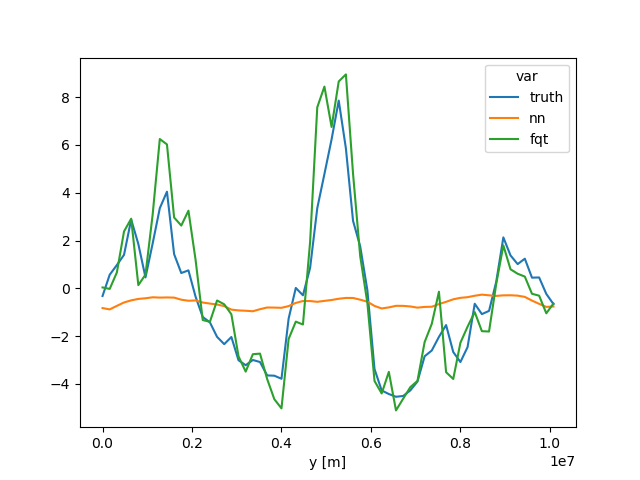

In [75]:
Image(filename='/local/S.Rasp/tmp/1-imbalance.png')   # 2-imbalance.png is the same

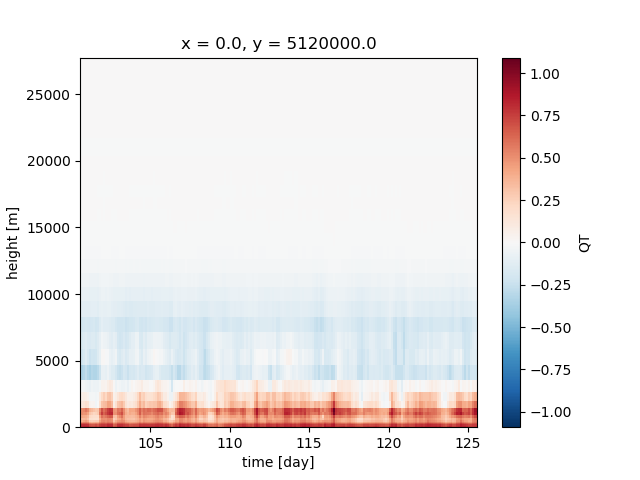

In [73]:
Image(filename='/local/S.Rasp/tmp/q2_1-32.png')

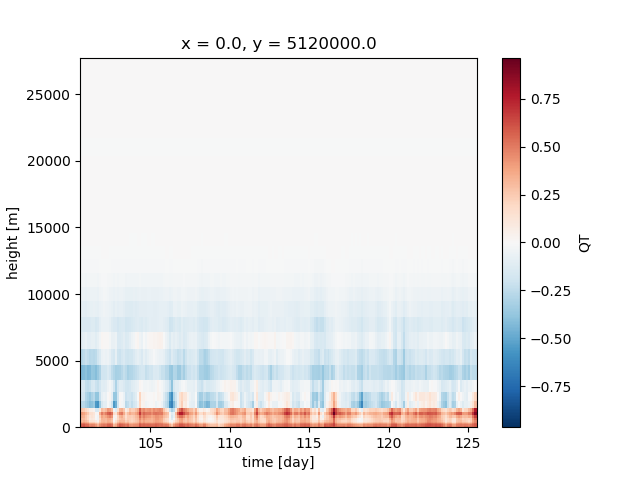

In [74]:
Image(filename='/local/S.Rasp/tmp/q2_2-32.png')

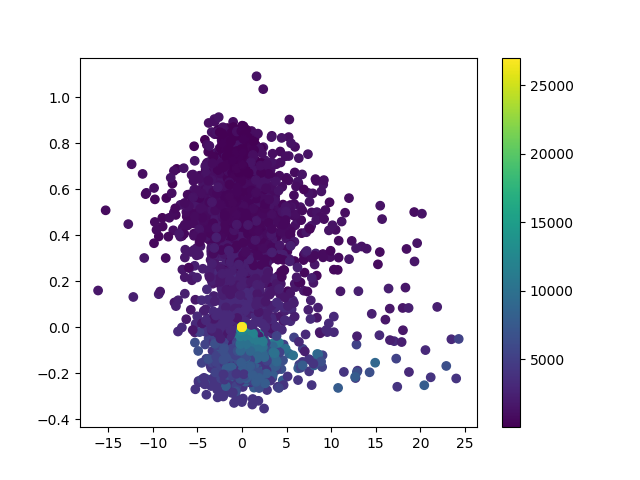

In [76]:
Image(filename='/local/S.Rasp/tmp/scatter_fqt_q2_1-32.png')

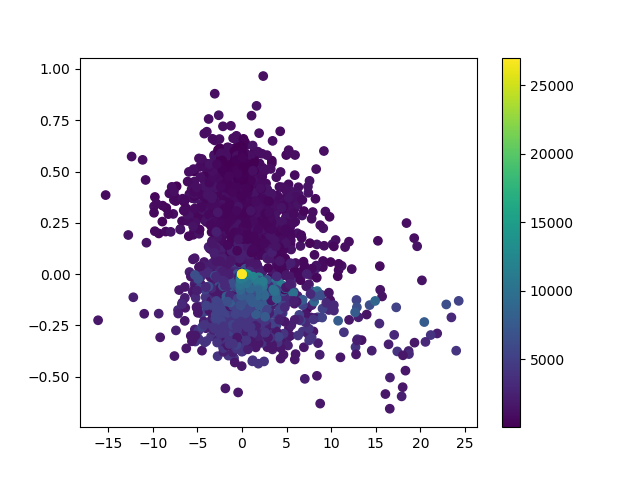

In [77]:
Image(filename='/local/S.Rasp/tmp/scatter_fqt_q2_2-32.png')

# Ok, what is actually going on here?

In [78]:
import pdb

In [81]:
pdb.run('uwnet/train.py')

> <string>(1)<module>()->None


(Pdb)  n


NameError: name 'uwnet' is not defined
> <string>(1)<module>()->None
--KeyboardInterrupt--


(Pdb)  q


In [84]:
!python -m pdb uwnet.train

Error: uwnet.train does not exist


Here is what happens:

```
in my_train.py:

Trainer().train()

in __init__.py:

def __init__(self, _run, lr, loss_scale):
    # setup logging
    logging.basicConfig(level=logging.INFO)

    # db = MongoDBLogger()
    # experiment = Experiment(api_key="fEusCnWmzAtmrB0FbucyEggW2")
    self.logger = logging.getLogger(__name__)

    # get output directory
    self.output_dir = get_output_dir()

    self.dataset = get_dataset()
    
        def get_dataset(data):
            try:
                dataset = xr.open_zarr(data)
            except ValueError:
                dataset = xr.open_dataset(data)  <--- This one!

            try:
                return dataset.isel(step=0).drop('step').drop('p')  <-- This one
            except:
                return dataset
    
    
    self.mass = torch.tensor(self.dataset.layer_mass.values).view(
        -1, 1, 1).float()
    self.z = torch.tensor(self.dataset.z.values).float()
    self.time_step = get_timestep(self.dataset)
    
        def get_timestep(data):
            time_dim = 'time'
            time = data[time_dim]
            dt = np.diff(time)

            all_equal = dt.std() / dt.mean() < 1e-6
            if not all_equal:
                raise ValueError("Data must be uniformly sampled in time")

            if time.units.startswith('d'):
                return dt[0] * 86400 <--- this one
            elif time.units.startswith('s'):
                return dt[0]
            else:
                raise ValueError(
                    f"Units of time are {time.units}, but must be either seconds"
                    "or days")
                    

    self.train_loader = get_data_loader(self.dataset)
    
        def get_data_loader(data: xr.Dataset, x, y, time_sl, vertical_grid_size,
                    batch_size):
            ds = data.isel(
                z=slice(0, vertical_grid_size),  <-- select all levs, xs and ys. Set at top in Sacred config!
                y=slice(*y),  
                x=slice(*x),
                time=slice(*time_sl))


            train_data = XRTimeSeries(ds)   # This is now in datasets.py, see below
            return DataLoader(
                train_data, batch_size=batch_size, shuffle=True)  # This is a Pytorch class
        

    self.model = get_model(*get_pre_post(self.dataset))
    
        def get_pre_post(data, _config):  <-- What is this? Probably worth looking into all these files
            kind = _config['kind']

            if kind == 'pca':  <-- THIS ONE
                return get_pre(data, m=20), get_post(data, m=20)
                
                    def get_post(data, m=20):
                        logger.info("Fitting PCA models for outputs")
                        q1 = compute_apparent_source(data.SLI, data.FSLI * 86400).dropna('time') --< Needs to drop beginning or end or something
                            <--- data.SLI = Liquid/Ice static energy
                            <--- FSLI = Forcing, but what is that?
                            
                            def compute_apparent_source(prog, forcing):
                                dt = prog.time[1] - prog.time[0]
                                avg_forcing = (forcing + forcing.shift(time=-1))/2
                                return (prog.shift(time=-1) - prog)/dt - avg_forcing
                                
                            
                        q2 = compute_apparent_source(data.QT, data.FQT * 86400).dropna('time')

                        ds = xr.Dataset({'Q1': q1, 'Q2': q2})
                        df = prepare_data(ds, exog=['Q1', 'Q2'])   <-- convert to pandas as in inps

                        funcs = {
                            'SLI': fit_pca_inverse_transform(df['Q1'], m),
                            'QT': fit_pca_inverse_transform(df['Q2'], m),
                        }

                        return MapByKey(funcs)
                
                    def get_pre(data, m=20):
                        logger.info("Building preprocessing module")
                        keys = ['QT', 'SLI', 'SHF', 'LHF', 'SOLIN', 'SST']  <-- What!? Inps are hardcoded?
                        df = prepare_data(data, exog=keys)  <-- This is now a pd.Dataframe n_samples x N_stacked_levs
                        
                            def prepare_data(data, exog=['QT', 'SLI', 'SST', 'SOLIN'], sample=None):
                                """Flatten XArray dataset into dataframe.

                                The columns of the dataframe are the variables names and height indices.
                                The rows are the samples, which are taken along 'x', 'y', and 'time'.
                                """
                                logger.info("Flattening xarray Dataset to pandas DataFrame")
                                size = data[exog].nbytes/1e9
                                logger.info(f"Size: {size} GB")
                                vals = []
                                names = []
                                sample_dims = ['x', 'y', 'time']
                                for key in exog:
                                    val = data[key].stack(s=sample_dims)
                                    if 'z' not in val.dims:
                                        val = val.expand_dims('z')

                                    arr = val.transpose('s', 'z').values
                                    vals.append(arr)

                                    for z in range(arr.shape[1]):
                                        names.append((key, z))

                                inputs = np.concatenate(vals, axis=1)
                                idx = pd.MultiIndex.from_tuples(names)
                                return pd.DataFrame(inputs, columns=idx)
                            
                        transformers = {}
                        for key in keys:
                            x = df[key]
                            n = x.shape[1]

                            if n == 1:  <-- for nz = 1 vars
                                logger.info(f"Fitting Scaler for {key}")
                                transformers[key] = fit_scaler_transform(x) <-- Use sklearn.StandardScaler()
                            else:   <-- This is for lev vars
                                logger.info(f"Fitting PCA for {key}")
                                transformers[key] = fit_pca_transform(x, m)
                                
                                def fit_pca_transform(x, n=16):  <-- x df with n_sample x n_lev
                                    pca = PCA(n_components=n, whiten=True) <-- sklearn PCA
                                    pca.fit(x)
                                    return LinearFixed.from_affine(pca.transform, x.shape[1])
                                    
                                        class LinearFixed(nn.Module):
                                            """A linear tranform with fixed weights and bias

                                            Useful for representing scikit-learn affine transform functions
                                            """
                                            
                                            @classmethod
                                            def from_affine(cls, func, n):
                                                """Initialize from an arbitrary python function

                                                Parameters
                                                ----------
                                                func
                                                    function has input dimension n and output dimension m
                                                n : int
                                                    input dimensions
                                                """
                                                args = get_affine_transforms(func, n)  <-- args[0].shape = (34, 20)
                                                   <-- args[1].shape = (34, 20)
                                                
                                                    def get_affine_transforms(func, n):
                                                        """Get weights matrix and bias of an affine function

                                                        func(I) = A + b
                                                        func(0) = b

                                                        """
                                                        identity = np.eye(n)
                                                        z = np.zeros((1, n))

                                                        b = func(z)
                                                        A = func(identity) - b
                                                        return A, b
                                                        
                                                        
                                                args = [torch.tensor(arg, requires_grad=True) for arg in args]
                                                   <-- convert to torch tensor, probably used later for online PCA
                                                return cls(*args)

                        return MapByKey(transformers)
                
                
            elif kind == 'orig':
                return get_pre_post_orig(data, *args)
            elif kind == 'mix':
                pre = get_pre(data, m=20)
                _ , post= get_pre_post_orig(data, *args)
                return pre, post
            elif kind == 'saved':
                path = _config['path']
                logger.info(f"Loading pre/post module from {path}")
                return torch.load(path)
            elif kind == 'lower_atmos':
                pre, post = get_pre_post_orig(data, n=34)
                lower = LowerAtmosInput()
                pre = Sequential(pre, lower)
                return pre, post
                
         def get_model(pre, post, _config):
            """Create an MLP with scaled inputs and outputs
            """
            kind = _config['kind']

            if kind == 'inner_model':  <-- This one
                return InnerModel(pre, post).to(dtype=torch.float)
                
                    class InnerModel(nn.Module, XRCallMixin):
                        """Inner model which operates with height along the last dimension"""

                        def __init__(self, pre, post):
                            "docstring"
                            super(InnerModel, self).__init__()

                            n = 256
                            transpose = um.ValMap(um.RPartial(torch.transpose, -3, -1))
                            self.input_names = [name for name, _ in pre.inputs]
                            self.model = nn.Sequential(
                                transpose,
                                pre,
                                um.LinearDictIn([(name, num) for name, num in pre.outputs], n),
                                nn.ReLU(),
                                nn.Linear(n, n),
                                nn.ReLU(),
                                nn.Linear(n, n),
                                nn.ReLU(),
                                um.LinearDictOut(n, [(name, num) for name, num in post.inputs]),
                                post,
                                transpose
                            )

    def forward(self, x):
        return self.model(x[self.input_names])
            elif kind == 'causal':
                inner = get_causal_inner_model(pre)

            self.optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
            self.criterion = weighted_mean_squared_error(
                weights=self.mass / self.mass.mean(), dim=-3)
            self.plot_manager = TrainingPlotManager(ex, self.model, self.dataset)
            self.setup_engine()



class XRTimeSeries(Dataset):
    """A pytorch Dataset class for time series data in xarray format

    This function assumes the data has dimensions ['time', 'z', 'y', 'x'], and
    that the axes of the data arrays are all stored in that order.

    An individual "sample" is the full time time series from a single
    horizontal location. The time-varying variables in this sample will have
    shape (time, z, 1, 1).

    Examples
    --------
    >>> ds = xr.open_dataset("in.nc")
    >>> dataset = XRTimeSeries(ds)
    >>> dataset[0]

    """
    dims = ['time', 'z', 'x', 'y']

    def __init__(self, data, time_length=None):
        """
        Parameters
        ----------
        data : xr.DataArray
            An input dataset. This dataset must contain at least some variables
            with all of the dimensions ['time' , 'z', 'x', 'y'].
        time_length : int, optional
            The length of the time sequences to use, must evenly divide the
            total number of time points.
        """
        self.time_length = time_length or len(data.time)
        self.data = data
        self.numpy_data = {key: data[key].values for key in data.data_vars}  <-- He reads out all the files as np!?
        self.data_vars = set(data.data_vars)
        self.dims = {key: data[key].dims for key in data.data_vars}
        self.constants = {
            key
            for key in data.data_vars
            if len({'x', 'y', 'time'} & set(data[key].dims)) == 0
        }
        self.setup_indices()
        
    def setup_indices(self):
        len_x = len(self.data['x'].values)
        len_y = len(self.data['y'].values)
        len_t = len(self.data['time'].values)

        x_iter = range(0, len_x, 1)
        y_iter = range(0, len_y, 1)
        t_iter = range(0, len_t, self.time_length)   <-- I don't get that. indices = sample for x and y but entire time slice
        assert len_t % self.time_length == 0
        self.indices = list(product(t_iter, y_iter, x_iter))
        
        def __getitem__(self, i):
            t, y, x = self.indices[i]
            output_tensors = {}
            for key in self.data_vars:
                if key in self.constants:
                    continue

                data_array = self.numpy_data[key]
                if 'z' in self.dims[key]:
                    this_array_index = (slice(t, t + self.time_length),
                                        slice(None), y, x)
                else:
                    this_array_index = (slice(t, t + self.time_length), None, y, x)

                sample = data_array[this_array_index][:, :, np.newaxis, np.newaxis]
                output_tensors[key] = sample.astype(np.float32)
            return output_tensors   <-- This is a dictionary with one "sample": Shape [time, lev, 1, 1]

``` 



# Try to do the training in this notebook

In [8]:
SAM_DIR

'/local/S.Rasp/SAM/'

In [6]:

import logging
import os
from contextlib import contextmanager
from os.path import join

from sacred import Experiment

import torch
import xarray as xr
from torch.utils.data import DataLoader
from uwnet.model import get_model
from uwnet.pre_post import get_pre_post
from uwnet.training_plots import TrainingPlotManager
from uwnet.datasets import XRTimeSeries, get_timestep
from uwnet.loss import (weighted_mean_squared_error, total_loss)
from ignite.engine import Engine, Events

# ex = Experiment("Q1")

# XRTimeSeries = ex.capture(XRTimeSeries)
# TrainingPlotManager = ex.capture(TrainingPlotManager, prefix='plots')
# get_model = ex.capture(get_model, prefix='model')
# get_pre_post = ex.capture(get_pre_post, prefix='prepost')


"""Default configurations managed by sacred"""
data = "/local/S.Rasp/SAM/2018-12-15-longitude-slice-ngaqua.nc"
lr = .001
epochs = 2
model_dir = 'models'
skip = 5
seq_length = 1
batch_size = 256
vertical_grid_size = 34
loss_scale = {
    'LHF': 150,
    'SHF': 10,
    'RADTOA': 600.0,
    'RADSFC': 600.0,
    'U': 5.0,
    'V': 5.0,
    'Prec': 8,
    'QP': 0.05,
    'QN': 0.05,
    'QT': 1.0,
    'SLI': 2.5
}

# y indices to use for training
y = (None, None)
x = (None, None)
time_sl = (None, None)
output_dir = None

prognostics = ['QT', 'SLI']
prepost = dict(
    kind='pca',
    path='models/prepost.pkl'
)

model = dict(
    kind='inner_model'
)

plots = dict(
    interval=1,
    single_column_locations=[(32, 0)]
)

file_name='test'


def get_dataset(data):
    try:
        dataset = xr.open_zarr(data)
    except ValueError:
        dataset = xr.open_dataset(data)

    try:
        return dataset.isel(step=0).drop('step').drop('p')
    except:
        return dataset


def get_data_loader(data: xr.Dataset, x, y, time_sl, vertical_grid_size,
                    batch_size):
    ds = data.isel(
        z=slice(0, vertical_grid_size),
        y=slice(*y),
        x=slice(*x),
        time=slice(*time_sl))


    train_data = XRTimeSeries(ds)
    return DataLoader(
        train_data, batch_size=batch_size, shuffle=True)


def get_output_dir(model_dir=None, output_dir=None):
    """Get a unique output directory name using the run ID that sacred
    assigned OR return the specified output directory
    """
    if output_dir:
        return output_dir
    else:
        #file_name = str(_run._id)
        return join(model_dir, file_name)




def is_one_dimensional(val):
    return val.dim() == 2


def get_model_inputs_from_batch(batch, prognostics):
    """Redimension a batch from a torch data loader

    Torch's data loader class is very helpful, but it produces data which has a shape of (batch, feature). However, the models require input in the physical dimensions (time, z, y, x), this function reshapes these arrays.
    """
    from uwnet.timestepper import Batch
    return Batch(batch, prognostics)


class Trainer(object):
    """Utility object for training a neural network parametrization
    """

    def __init__(self, lr, loss_scale):
        # setup logging
        logging.basicConfig(level=logging.INFO)

        # db = MongoDBLogger()
        # experiment = Experiment(api_key="fEusCnWmzAtmrB0FbucyEggW2")
        self.logger = logging.getLogger(__name__)

        # get output directory
        self.output_dir = get_output_dir(model_dir)

        self.dataset = get_dataset(data)
        self.mass = torch.tensor(self.dataset.layer_mass.values).view(
            -1, 1, 1).float()
        self.z = torch.tensor(self.dataset.z.values).float()
        self.time_step = get_timestep(self.dataset)
        self.train_loader = get_data_loader(self.dataset, x, y, time_sl, vertical_grid_size, batch_size)

        self.model = get_model(*get_pre_post(self.dataset, prepost), model)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
        self.criterion = weighted_mean_squared_error(
            weights=self.mass / self.mass.mean(), dim=-3)
        #self.plot_manager = TrainingPlotManager(ex, self.model, self.dataset)
        self.setup_engine()

    def setup_engine(self):
        self.engine = Engine(self.step)
        self.engine.add_event_handler(
            Events.ITERATION_COMPLETED, self.after_batch)
        self.engine.add_event_handler(
            Events.ITERATION_COMPLETED, self.print_loss_info)
        self.engine.add_event_handler(
            Events.EPOCH_COMPLETED, self.after_epoch)

    def print_loss_info(self, engine):
        n = len(self.train_loader)
        batch = engine.state.iteration % (n + 1)
        log_str = f"[{batch}/{n}]:\t"
        for key, val in engine.state.loss_info.items():
            log_str += f'{key}: {val:.2f}\t'
            ex.log_scalar(key, val)
        self.logger.info(log_str)

    def step(self, engine, batch):
        self.optimizer.zero_grad()
        batch = get_model_inputs_from_batch(batch)
        loss, loss_info = total_loss(
            self.criterion, self.model, self.z, batch)
        loss.backward()
        self.optimizer.step()
        self.optimizer.zero_grad()
        engine.state.loss_info = loss_info
        return loss_info

    def compute_source_r2(self, batch):
        from .timestepper import Batch
        from toolz import merge_with
        from .loss import weighted_r2_score, r2_score
        src = self.model(batch)

        # compute the apparent source
        batch = Batch(batch, self.prognostics)
        g = batch.get_known_forcings()
        progs = batch.data[self.prognostics]
        storage = progs.apply(lambda x: (x[1:] - x[:-1]) / self.time_step)
        forcing = g.apply(lambda x: (x[1:] + x[:-1]) / 2)
        src = src.apply(lambda x: (x[1:] + x[:-1]) / 2)
        true_src = storage - forcing * 86400

        # copmute the metrics
        def wr2_score(args):
            x, y = args
            return weighted_r2_score(x, y, self.mass, dim=-3).item()

        r2s = merge_with(wr2_score, true_src, src)
        print(r2s)

        # compute the r2 of the integral
        pred_int = src.apply(lambda x: (x * self.mass).sum(-3))
        true_int = true_src.apply(lambda x: (x * self.mass).sum(-3))

        def scalar_r2_score(args):
            return r2_score(*args).item()

        def bias(args):
            x, y = args
            return (y.mean() - x.mean()).item() / 1000

        r2s = merge_with(scalar_r2_score, true_int, pred_int)
        print(r2s)

        r2s = merge_with(bias, true_int, pred_int)
        print(r2s)

    def after_batch(self, engine):
        state = engine.state
        batch_info = {
            'epoch': state.epoch,
            'loss': state.output,
        }
        ex.log_scalar('loss', batch_info['loss'])

    def after_epoch(self, engine):
        # save artifacts
        n = engine.state.epoch
        epoch_file = f"{n}.pkl"

        with self.change_to_work_dir():
            torch.save(self.model, epoch_file)
            ex.add_artifact(epoch_file)
            self.plot_manager(engine)

    def _make_work_dir(self):
        try:
            os.makedirs(self.output_dir)
        except OSError:
            pass

    @contextmanager
    def change_to_work_dir(self):
        """Context manager for using a working directory"""
        self.logger.info(f"Saving outputs in {self.output_dir}")
        self._make_work_dir()
        try:
            cwd = os.getcwd()
            os.chdir(self.output_dir)
            yield
        finally:
            os.chdir(cwd)

    def train(self, epochs):
        """Train the neural network for a fixed number of epochs"""
        self.engine.run(self.train_loader, max_epochs=epochs)


def train_pre_post(prepost):
    """Train the pre and post processing modules"""
    dataset = get_dataset()
    logging.info(f"Saving Pre/Post module to {prepost['path']}")
    torch.save(get_pre_post(dataset), prepost['path'])




In [7]:
trn = Trainer(lr=lr, loss_scale=loss_scale)

INFO:uwnet.pre_post:Building preprocessing module
INFO:uwnet.pre_post:Flattening xarray Dataset to pandas DataFrame
INFO:uwnet.pre_post:Size: 0.058987932 GB
INFO:uwnet.pre_post:Fitting PCA for QT
INFO:uwnet.pre_post:Fitting PCA for SLI
INFO:uwnet.pre_post:Fitting Scaler for SHF
/home/s/S.Rasp/miniconda3/envs/uwnet/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
INFO:uwnet.pre_post:Fitting Scaler for LHF
/home/s/S.Rasp/miniconda3/envs/uwnet/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
INFO:uwnet.pre_post:Fitting Scaler for SOLIN
/home/s/S.Rasp/miniconda3/envs/uwnet/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all con

In [98]:
dl = trn.train_loader

In [99]:
out = next(iter(dl))

In [100]:
type(out), out.keys()

(dict,
 dict_keys(['LHF', 'FV', 'QV', 'QT', 'W', 'FU', 'SOLIN', 'FQT', 'RADTOA', 'V', 'SHF', 'U', 'RADSFC', 'Prec', 'PP', 'SLI', 'TABS', 'SST', 'FSLI']))

In [101]:
out['QT'].size()

torch.Size([256, 640, 34, 1, 1])

In [102]:
m = trn.model

In [103]:
m

InnerModel(
  (model): Sequential(
    (0): ValMap(
      (fun): RPartial()
    )
    (1): MapByKey(
      (funcs): ModuleDict(
        (LHF): LinearFixed(1, 1)
        (QT): LinearFixed(34, 20)
        (SHF): LinearFixed(1, 1)
        (SLI): LinearFixed(34, 20)
        (SOLIN): LinearFixed(1, 1)
        (SST): LinearFixed(1, 1)
      )
    )
    (2): LinearDictIn(
      (LHF): Linear(in_features=1, out_features=256, bias=True)
      (QT): Linear(in_features=20, out_features=256, bias=True)
      (SHF): Linear(in_features=1, out_features=256, bias=True)
      (SLI): Linear(in_features=20, out_features=256, bias=True)
      (SOLIN): Linear(in_features=1, out_features=256, bias=True)
      (SST): Linear(in_features=1, out_features=256, bias=True)
    )
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): ReLU()
    (8): LinearDictOut(
      (QT): Linear(in_features=256, out_fea

In [104]:
pre = m.model[1]

In [105]:
input_names = [name for name, _ in pre.inputs]

In [106]:
input_names

['LHF', 'QT', 'SHF', 'SLI', 'SOLIN', 'SST']

In [107]:
prognostics

['QT', 'SLI']

In [108]:
batch = get_model_inputs_from_batch(out, prognostics)

In [109]:
batch.data['QT'].size()

torch.Size([256, 640, 34, 1, 1])

In [110]:
m_in = batch.data[input_names]

In [111]:
pred = m(m_in)

In [112]:
layers = [l for l in m.model]

In [113]:
layers

[ValMap(
   (fun): RPartial()
 ), MapByKey(
   (funcs): ModuleDict(
     (LHF): LinearFixed(1, 1)
     (QT): LinearFixed(34, 20)
     (SHF): LinearFixed(1, 1)
     (SLI): LinearFixed(34, 20)
     (SOLIN): LinearFixed(1, 1)
     (SST): LinearFixed(1, 1)
   )
 ), LinearDictIn(
   (LHF): Linear(in_features=1, out_features=256, bias=True)
   (QT): Linear(in_features=20, out_features=256, bias=True)
   (SHF): Linear(in_features=1, out_features=256, bias=True)
   (SLI): Linear(in_features=20, out_features=256, bias=True)
   (SOLIN): Linear(in_features=1, out_features=256, bias=True)
   (SST): Linear(in_features=1, out_features=256, bias=True)
 ), ReLU(), Linear(in_features=256, out_features=256, bias=True), ReLU(), Linear(in_features=256, out_features=256, bias=True), ReLU(), LinearDictOut(
   (QT): Linear(in_features=256, out_features=20, bias=True)
   (SLI): Linear(in_features=256, out_features=20, bias=True)
 ), MapByKey(
   (funcs): ModuleDict(
     (QT): LinearFixed(20, 34)
     (SLI): 

In [151]:
layers[0]

ValMap(
  (fun): RPartial()
)

In [114]:
tmp = layers[0](m_in)

In [115]:
tmp.data.keys(), tmp.data['QT'].size()

(dict_keys(['LHF', 'QT', 'SHF', 'SLI', 'SOLIN', 'SST']),
 torch.Size([256, 640, 1, 1, 34]))

In [116]:
layers[1]

MapByKey(
  (funcs): ModuleDict(
    (LHF): LinearFixed(1, 1)
    (QT): LinearFixed(34, 20)
    (SHF): LinearFixed(1, 1)
    (SLI): LinearFixed(34, 20)
    (SOLIN): LinearFixed(1, 1)
    (SST): LinearFixed(1, 1)
  )
)

In [117]:
tmp = layers[1](tmp)

In [118]:
tmp.data.keys(), tmp.data['QT'].size()

(dict_keys(['LHF', 'QT', 'SHF', 'SLI', 'SOLIN', 'SST']),
 torch.Size([256, 640, 1, 1, 20]))

In [120]:
layers[2]

LinearDictIn(
  (LHF): Linear(in_features=1, out_features=256, bias=True)
  (QT): Linear(in_features=20, out_features=256, bias=True)
  (SHF): Linear(in_features=1, out_features=256, bias=True)
  (SLI): Linear(in_features=20, out_features=256, bias=True)
  (SOLIN): Linear(in_features=1, out_features=256, bias=True)
  (SST): Linear(in_features=1, out_features=256, bias=True)
)

Linear dict in does a fully connected to 256 for all then adds them together!

In [121]:
tmp = layers[2](tmp)

In [122]:
tmp.size()

torch.Size([256, 640, 1, 1, 256])

In [123]:
layers[3]

ReLU()

In [124]:
tmp = layers[3](tmp)

In [125]:
layers[4]

Linear(in_features=256, out_features=256, bias=True)

In [126]:
tmp = layers[4](tmp)

In [127]:
layers[5]

ReLU()

In [128]:
tmp = layers[5](tmp)

In [129]:
layers[6]

Linear(in_features=256, out_features=256, bias=True)

In [130]:
tmp = layers[6](tmp)

In [131]:
layers[7]

ReLU()

In [135]:
tmp = layers[7](tmp)

In [136]:
tmp.size()

torch.Size([256, 640, 1, 1, 256])

In [137]:
layers[8]

LinearDictOut(
  (QT): Linear(in_features=256, out_features=20, bias=True)
  (SLI): Linear(in_features=256, out_features=20, bias=True)
)

In [139]:
tmp = layers[8](tmp)

In [142]:
tmp.data.keys(), tmp.data['QT'].size()

(dict_keys(['QT', 'SLI']), torch.Size([256, 640, 1, 1, 20]))

In [143]:
layers[9]

MapByKey(
  (funcs): ModuleDict(
    (QT): LinearFixed(20, 34)
    (SLI): LinearFixed(20, 34)
  )
)

In [144]:
tmp = layers[9](tmp)

In [145]:
tmp.data.keys(), tmp.data['QT'].size()

(dict_keys(['QT', 'SLI']), torch.Size([256, 640, 1, 1, 34]))

In [146]:
layers[10]

ValMap(
  (fun): RPartial()
)

In [147]:
tmp = layers[10](tmp)

In [149]:
tmp.data.keys(), tmp.data['QT'].size()

(dict_keys(['QT', 'SLI']), torch.Size([256, 640, 34, 1, 1]))

In [150]:
layers[11]

IndexError: list index out of range

## Understand sklearn PCA and Standard scaler

In [183]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [160]:
from uwnet.pre_post import prepare_data

In [156]:
sample_dims = ['x', 'y', 'time']

In [163]:
prep_data = prepare_data(ngaqua.isel(step=0).drop('step').drop('p'), exog=['QT', 'SLI', 'SHF', 'LHF', 'SOLIN', 'SST'])

INFO:uwnet.pre_post:Flattening xarray Dataset to pandas DataFrame
INFO:uwnet.pre_post:Size: 0.058987932 GB


In [268]:
len(prep_data)

204800

### StandardScaler

In [166]:
tmp = prep_data['LHF']; tmp.head()

,0
0,37.092140
1,40.888325
2,42.016720
3,42.199074
4,38.494644


In [167]:
scaler = StandardScaler().fit(tmp)

/home/s/S.Rasp/miniconda3/envs/uwnet/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [172]:
tmp.shape[1]

1

In [173]:
from uwnet.modules import LinearFixed, get_affine_transforms

In [174]:
args = get_affine_transforms(scaler.transform, 1)

In [176]:
args

(array([[0.01668124]]), array([[-1.59480342]]))

In [187]:
scaler.mean_, scaler.var_, np.sqrt(scaler.var_)

(array([95.60459745]), array([3593.71172925]), array([59.94757484]))

In [188]:
1/np.sqrt(scaler.var_), scaler.mean_/np.sqrt(scaler.var_)

(array([0.01668124]), array([1.59480342]))

### PCA

In [189]:
tmp = prep_data['QT']; tmp.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,4.361264,4.089715,3.989790,3.890260,3.810691,3.746974,3.629813,3.375355,2.930388,2.326267,...,0.000086,0.000084,0.000081,0.000072,0.000004,0.0,0.0,0.0,0.0,0.0
1,4.333887,4.060319,3.962644,3.887188,3.831795,3.791692,3.724110,3.480544,2.946113,2.254538,...,0.000083,0.000081,0.000079,0.000071,0.000005,0.0,0.0,0.0,0.0,0.0
2,4.279087,4.029076,3.945002,3.869809,3.809435,3.762944,3.690197,3.459121,2.973407,2.100534,...,0.000082,0.000079,0.000078,0.000070,0.000005,0.0,0.0,0.0,0.0,0.0
3,4.343656,4.018750,3.900565,3.825108,3.764900,3.709638,3.626374,3.397383,2.960023,2.132427,...,0.000080,0.000079,0.000077,0.000069,0.000005,0.0,0.0,0.0,0.0,0.0
4,4.585892,4.219153,3.990348,3.816269,3.744457,3.663324,3.563959,3.367351,2.988392,2.244937,...,0.000081,0.000079,0.000077,0.000068,0.000005,0.0,0.0,0.0,0.0,0.0


In [190]:
tmp.shape[1]

34

In [237]:
pca = PCA(n_components=20, whiten=True)

In [238]:
pca.fit(tmp)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [239]:
reduc = pca.transform(tmp)

In [240]:
reduc.shape

(204800, 20)

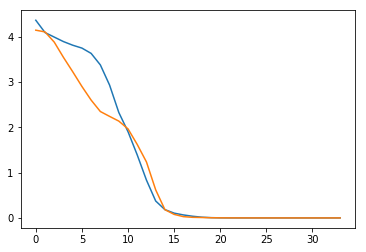

In [241]:
plt.plot(tmp.iloc[0])
plt.plot(tmp.iloc[-1])

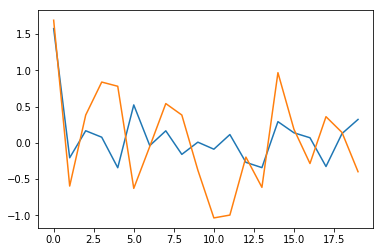

In [242]:
plt.plot(reduc[0])
plt.plot(reduc[-1])

In [243]:
inv = pca.inverse_transform(reduc); inv.shape

(204800, 34)

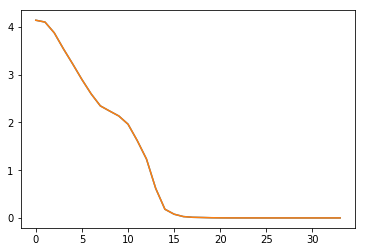

In [244]:
plt.plot(tmp.iloc[-1])
plt.plot(inv[-1])

In [245]:
args = get_affine_transforms(pca.transform, 34)

In [247]:
args[0].shape, args[1].shape

((34, 20), (1, 20))

## What about the trasnformation for outputs

In [248]:
from uwnet.thermo import compute_apparent_source

In [250]:
ngaqua.SLI.shape

(640, 2, 34, 64, 5)

In [256]:
q1 = compute_apparent_source(ngaqua.SLI, ngaqua.FSLI * 86400).dropna('time')
q2 = compute_apparent_source(ngaqua.QT, ngaqua.FQT * 86400).dropna('time')

In [259]:
q1.shape, q2.shape

((639, 2, 34, 64, 5), (639, 2, 34, 64, 5))

In [257]:
ds = xr.Dataset({'Q1': q1, 'Q2': q2})

In [262]:
prep_out = prepare_data(ds.isel(step=0).drop('step'), exog=['Q1', 'Q2'])

INFO:uwnet.pre_post:Flattening xarray Dataset to pandas DataFrame
INFO:uwnet.pre_post:Size: 0.111242644 GB


In [265]:
prep_out.head()

Q1                                                              \
         0         1         2         3         4         5         6    
0  1.248608  1.495984  1.451336  1.168046  0.570157 -0.048394 -3.044226   
1  0.114930  0.923622  0.818859 -0.451247 -0.850479 -0.629650 -2.294974   
2 -0.688917  0.485580  0.132802 -0.062035  0.334348 -0.566224 -1.025435   
3 -1.649230 -5.611102 -2.145864 -0.097331  0.422657  0.194806 -0.835998   
4  2.277616  1.996909 -4.500249 -7.907377 -4.757239 -2.838343 -3.599263   

                                     ...             Q2                      \
         7         8         9       ...             24        25        26   
0 -4.969207 -2.731678  0.010295      ...      -0.000018 -0.000019 -0.000014   
1 -3.828819 -6.408956 -1.888401      ...      -0.000011 -0.000013 -0.000009   
2 -4.382572 -6.921966 -5.125395      ...      -0.000013 -0.000003 -0.000013   
3 -3.605635 -7.447397 -4.992517      ...       0.000002 -0.000001 -0.000008   
4 -4.576428 -7.393138 -3.319265      ...       0.000009 -0.000014 -0.000013   

                                                                     \
             27        28            29            30            31   
0 -9.397004e-06  0.000013 -2.432375e-11 -3.678064e-15 -2.355996e-25   
1 -6.042534e-06  0.000020 -9.927329e-10 -1.052206e-13 -1.771593e-18   
2 -9.144631e-06  0.000006 -2.531431e-07 -8.507036e-12 -3.278339e-16   
3 -7.655602e-07  0.000015 -2.521747e-07 -8.405494e-12 -3.260624e-16   
4 -4.648051e-06  0.000018 -2.121629e-08 -8.748194e-16 -1.923240e-20   

                               
             32            33  
0 -4.478749e-30 -1.776159e-41  
1 -5.191938e-24 -1.148449e-32  
2 -6.506346e-21 -1.148450e-32  
3 -6.501154e-21 -2.944418e-33  
4 -2.573848e-25 -2.944405e-33  

[5 rows x 68 columns]

In [266]:
len(prep_out)

204480

## Understand the loss

In [307]:
src = m(batch.data)

In [301]:
src.data.keys()

dict_keys(['QT', 'SLI'])

In [291]:
g = batch.get_known_forcings()   # This gets FQT and FSLI

In [292]:
g.data.keys()

dict_keys(['QT', 'SLI'])

In [289]:
batch.prognostics

['QT', 'SLI']

In [293]:
progs = batch.get_prognostics()   # This simply gets QT and SLI

In [295]:
progs['QT'].size()

torch.Size([256, 640, 34, 1, 1])

In [297]:
forcing = g.apply(lambda x: (x[:,1:] + x[:,:-1]) / 2)   # mean forcing

In [298]:
x0 = progs.apply(lambda x: x[:,:-1])   # from start to -1

In [299]:
x1 = progs.apply(lambda x: x[:,1:])   # One time step later

In [308]:
src = src.apply(lambda x: x[:,:-1])   # Predictions for one time step later, I think this is Q1 and Q2

In [304]:
dt = 0.125

In [305]:
pred = x0 + dt * src + dt * 86400 * forcing   # x_now + subgrid (NN pred) + adv forcing

In [309]:
criterion = weighted_mean_squared_error(weights=trn.mass / trn.mass.mean(), dim=-3)
"""Compute the weighted mean squared error

    Parameters
    ----------
    truth: torch.tensor
    prediction: torch.tensor
    weights: torch.tensor
        one dimensional tensor of weights. Must be the same length as the truth
        and prediction arrays along the dimension `dim`
    dim:
        the dimension the data should be weighted along
    """

'Compute the weighted mean squared error\n\n    Parameters\n    ----------\n    truth: torch.tensor\n    prediction: torch.tensor\n    weights: torch.tensor\n        one dimensional tensor of weights. Must be the same length as the truth\n        and prediction arrays along the dimension `dim`\n    dim:\n        the dimension the data should be weighted along\n    '

In [312]:
from uwnet.loss import *

In [314]:
l1 = compute_loss(criterion, x1, pred) / dt   # This simply applies the criterion to QT and SLI separately
# So this is a simple MSE between the predicted QT and SLI and the actual one one time step ahead.

In [315]:
l1

tensor(2.3773, grad_fn=<DivBackward0>)

In [317]:
l2 = equilibrium_penalty(criterion, m, batch, dt)

In [318]:
from random import randint
i = randint(0, batch.num_time - 1)

In [319]:
i

413

In [320]:
state0 = batch.get_prognostics_at_time(i)

In [323]:
state0.data.keys()

dict_keys(['QT', 'SLI'])

In [326]:
state0['QT'].size()   # Single time step but for a batch of xy

torch.Size([256, 34, 1, 1])

In [330]:
mean = batch.get_prognostics().apply(lambda x: x.mean(dim=1))   # Mean over the time dimension

In [331]:
mean['QT'].size()

torch.Size([256, 34, 1, 1])

In [332]:
g = batch.get_known_forcings()

In [333]:
mean_forcing = g.apply(lambda x: x.mean(dim=1))   # Time mean forcing

In [334]:
state = state0

In [335]:
n = 20

In [337]:
t=0

In [342]:
inputs = batch.get_model_inputs(i, state)   # These are the inputs at time step i

In [350]:
inputs.data.keys()

dict_keys(['LHF', 'FV', 'SHF', 'QV', 'U', 'W', 'RADSFC', 'FU', 'Prec', 'SOLIN', 'PP', 'FQT', 'TABS', 'RADTOA', 'V', 'SST', 'FSLI', 'QT', 'SLI'])

In [341]:
inputs['QT'].size()

torch.Size([256, 34, 1, 1])

In [344]:
src = m(inputs)

In [345]:
state = state + dt * src + dt * mean_forcing * 86400   # Predict ahead one time step applying the time mean forcing

In [346]:
for t in range(n):
    inputs = batch.get_model_inputs(i, state)
    src = m(inputs)
    state = state + dt * src + dt * mean_forcing * 86400

In [347]:
compute_loss(criterion, mean, state)   
# compute the loss between a 20 time step prediction started from a random state with time average forcings and the time mean state!?

tensor(10.4400, grad_fn=<AddBackward0>)

In [348]:
loss = l1 + l2 * .1